<a href="https://colab.research.google.com/github/alibrj82/ChestX-ray8/blob/main/ChestX_ray8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Google Drive'ı Bağlama
drive.mount('/content/drive')

# Yolları Tanımlama
images_folder_path = '/content/drive/My Drive/ChestX-ray8/images1/images'
metadata_path = '/content/drive/My Drive/CXR8/Data_Entry_2017_v2020.csv'

# Metadata CSV dosyasını yüklemek
df = pd.read_csv(metadata_path)
print(df.shape)
print(df.head())  # DataFrame'in ilk birkaç satırını kontrol etmek
# Eksik değerleri kontrol etmek
print(df.isnull().sum())

# Benzersiz hasta sayısını saymak
unique_patients = df['Patient ID'].nunique()
print(f"Unique patients: {unique_patients}")

# Hastaların birden fazla görüntüye sahip olup olmadığını kontrol etmek
patient_image_count = df['Patient ID'].value_counts()
print(patient_image_count)


# Klasördeki görselleri doğrulama
images_in_folder = os.listdir(images_folder_path)
print(f"Total images in folder: {len(images_in_folder)}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(112120, 11)
        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F           

# Eksik değerleri

*   Veri kümesi meta verileri birden fazla sütun içeriyor ve hiçbirinde eksik değer bulunmuyor (tüm sütunlar için eksik giriş sayısı 0 olarak görünüyor). Tüm sütunlar tamamen dolu, bu da elimizde eksiksiz bir veri kümesi olduğunu gösteriyor. Eksik veriler için ön işleme yapılmasına gerek yok.
# Patient Id

*   Veri kümesi toplamda 30.805 benzersiz hastayı içermektedir. Örneğin, 10007 numaralı Hasta Kimliği 184 görüntüye sahipken, 13617, 13610 ve 13609 gibi bazı kimlikler yalnızca birer görüntüye sahiptir.
*   Bu durum, görüntü sayısı açısından dengesiz bir veri kümesi ortaya çıkarmaktadır.





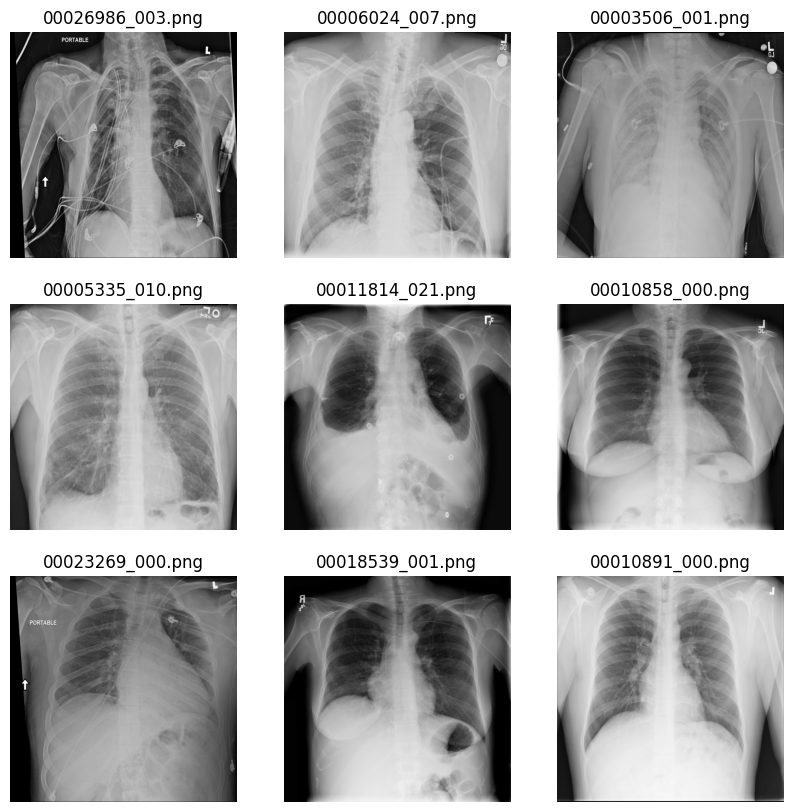

In [2]:
# CSV dosyasından birkaç görsel örneği seçmek ve görüntülemeyi denemek.
sample_images = df['Image Index'].sample(9).values  # Rastgele 9 görüntü seçmek.

plt.figure(figsize=(10, 10))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(images_folder_path, image_name)

    if os.path.exists(image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    else:
        print(f"Image {image_name} not found in folder.")

plt.show()

In [3]:

# Görüntü istatistiklerini hesaplayan bir fonksiyon oluşturmak.
def compute_image_statistics(image):
    min_val = image.min()
    max_val = image.max()
    mean_val = image.mean()
    std_val = image.std()
    return min_val, max_val, mean_val, std_val

# Her bir görüntü için istatistikleri hesaplayıp ve görüntülemek.
for image_name in sample_images:
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale for analysis
        min_val, max_val, mean_val, std_val = compute_image_statistics(img)
        print(f"Stats for {image_name} - Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Std: {std_val}")

Stats for 00026986_003.png - Min: 0, Max: 255, Mean: 104.84352207183838, Std: 58.45892158616743
Stats for 00006024_007.png - Min: 0, Max: 231, Mean: 168.4039821624756, Std: 38.9175280389053
Stats for 00003506_001.png - Min: 0, Max: 236, Mean: 131.71014499664307, Std: 48.0893282569255
Stats for 00005335_010.png - Min: 0, Max: 238, Mean: 161.1626443862915, Std: 40.4470274703375
Stats for 00011814_021.png - Min: 0, Max: 255, Mean: 119.04305267333984, Std: 67.51504459448641
Stats for 00010858_000.png - Min: 0, Max: 255, Mean: 132.65211296081543, Std: 63.927633825163475
Stats for 00023269_000.png - Min: 0, Max: 255, Mean: 113.67964267730713, Std: 46.883382011083484
Stats for 00018539_001.png - Min: 0, Max: 248, Mean: 105.87970066070557, Std: 74.33984055620056
Stats for 00010891_000.png - Min: 0, Max: 253, Mean: 175.9336347579956, Std: 55.92758908158997




1.   Min değeri: En küçük piksel yoğunluğu (en karanlık pikseli belirtir).
2.   Max değeri: En büyük piksel yoğunluğu (en parlak pikseli belirtir).  

1.   Ortalama değeri: Görüntüdeki piksel yoğunluklarının ortalaması.
2.   Standart sapma (std): Piksel yoğunluklarının varyasyonu veya yayılması (Piksel yoğunluklarının ne kadar yayıldığını ölçer. Yüksek değerler, görüntüde daha fazla kontrast veya varyasyon olduğunu gösterir.)





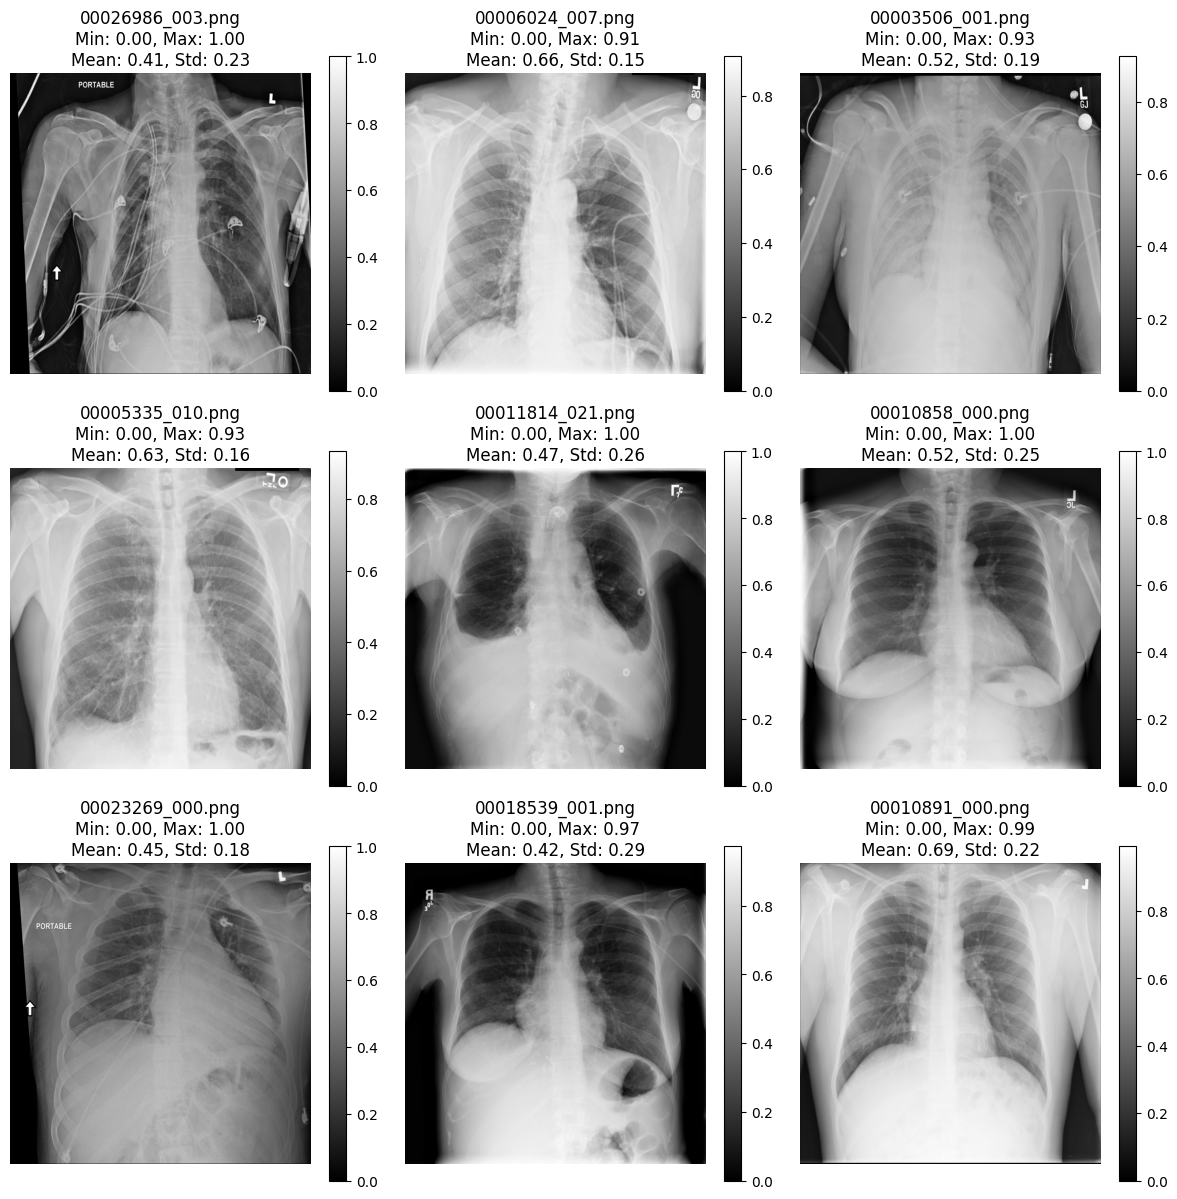

In [4]:

# 9 örnek görüntü arasında döngü yapmak
plt.figure(figsize=(12, 12))
for idx, image_name in enumerate(sample_images):
    image_path = os.path.join(images_folder_path, image_name)

    if os.path.exists(image_path):
        # Görüntü yüklemek
        raw_image = plt.imread(image_path)  # Görüntü okumak

        # Display the image
        plt.subplot(3, 3, idx + 1)  # Görüntüleri görüntülemek için 3x3'lük bir ızgara oluşturmak
        im = plt.imshow(raw_image, cmap='gray')
        plt.colorbar(im)  # Piksel yoğunluğu için bir renk çubuğu eklemek
        plt.axis('off')
        plt.title(f"{image_name}\nMin: {raw_image.min():.2f}, Max: {raw_image.max():.2f}\nMean: {raw_image.mean():.2f}, Std: {raw_image.std():.2f}")
    else:
        print(f"Image {image_name} not found.")

plt.tight_layout()  # Okunabilirlik için düzeni ayarlamak
plt.show()


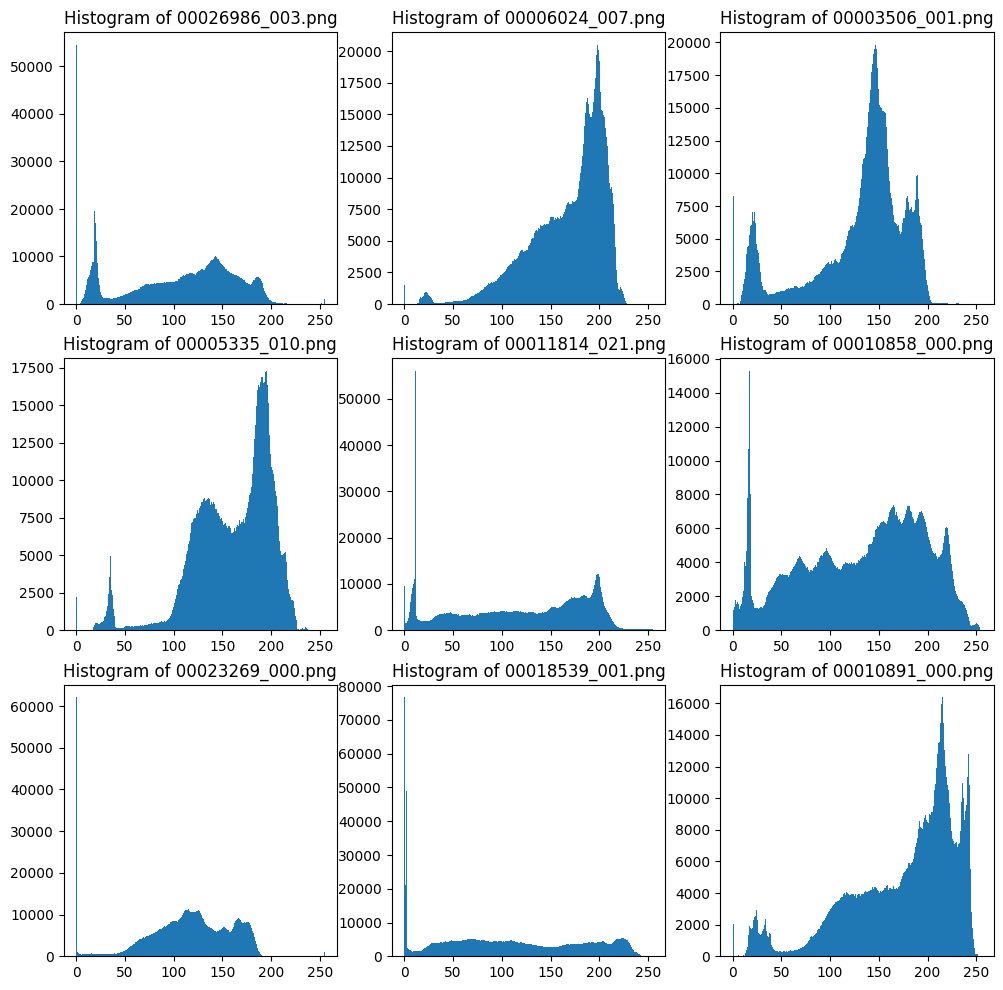

In [5]:
# Plot histogram for selected images
plt.figure(figsize=(12, 12))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(3, 3, i + 1)
        plt.hist(img.ravel(), bins=256, range=(0, 255))
        plt.title(f"Histogram of {image_name}")
plt.show()

Histogramlar, her bir gri tonlamalı görüntüdeki piksel yoğunluk değerlerinin dağılımı hakkında bilgi sağlar.

*   X-axis: Piksel yoğunluk değerlerini temsil eder ve 0 (siyah) ile 255 (beyaz) arasında değişir.

*   Y-axis:Her bir yoğunluk değerine karşılık gelen piksel sayısını gösterir.
*   Eğer çoğu değer 0’a yakınsa, görüntü karanlıktır.

*   Eğer çoğu değer 255’e yakınsa, görüntü parlaktır

*   Dengeli bir dağılım, iyi aydınlatılmış bir görüntüyü işaret eder.
*   Dar bir histogram (değerlerin küçük bir aralıkta yoğunlaşması), düşük kontrastı ifade eder.

*   Geniş bir histogram (değerlerin aralık boyunca yayılması), yüksek kontrastı gösterir.















In [6]:
import numpy as np

def contrast_stretch(img):
    return ((img - img.min()) * (255 / (img.max() - img.min()))).astype(np.uint8)

def gamma_correction(img, gamma):
    return (np.power(img / 255.0, gamma) * 255).astype(np.uint8)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

enhanced_images = []
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(images_folder_path, image_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    contrast_img = contrast_stretch(img)
    gamma_img = gamma_correction(contrast_img, gamma=1.5)
    equalized_img = histogram_equalization(contrast_img)
    enhanced_images.append((img, contrast_img, gamma_img, equalized_img))


In [7]:
def apply_median_blur(img, ksize):
    return cv2.medianBlur(img, ksize)

def apply_gaussian_blur(img, ksize, sigma):
    return cv2.GaussianBlur(img, (ksize, ksize), sigma)

denoised_images = []
for i, (_, contrast_img, _, _) in enumerate(enhanced_images):
    median_img = apply_median_blur(contrast_img, ksize=5)
    gaussian_img = apply_gaussian_blur(contrast_img, ksize=5, sigma=1)
    denoised_images.append((contrast_img, median_img, gaussian_img))


In [8]:
def random_rotation(img, angle_range):
    angle = np.random.uniform(-angle_range, angle_range)
    center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rot_matrix, img.shape[1::-1], flags=cv2.INTER_LINEAR)

def horizontal_flip(img):
    return cv2.flip(img, 1)

transformed_images = []
for i, (contrast_img, median_img, gaussian_img) in enumerate(denoised_images):
    rotated_img = random_rotation(contrast_img, angle_range=10)
    flipped_img = horizontal_flip(contrast_img)
    transformed_images.append((median_img, rotated_img, flipped_img))


In [13]:
def fourier_transform_filter(img, cutoff_frequency):
    f_transform = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f_transform)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), dtype=np.uint8)
    mask[crow - cutoff_frequency:crow + cutoff_frequency,
         ccol - cutoff_frequency:ccol + cutoff_frequency] = 1
    f_filtered = f_shifted * mask
    f_ishifted = np.fft.ifftshift(f_filtered)
    img_filtered = np.abs(np.fft.ifft2(f_ishifted))
    return img_filtered.astype(np.uint8)

filtered_images = []
for i, (median_img, _, _) in enumerate(transformed_images):
    filtered_img = fourier_transform_filter(median_img, cutoff_frequency=30)
    filtered_images.append(filtered_img)


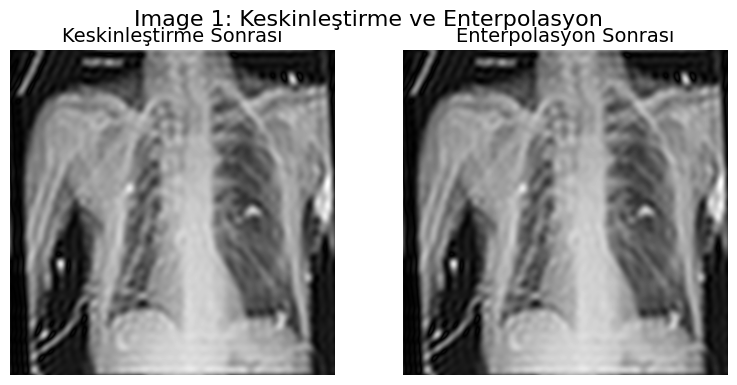

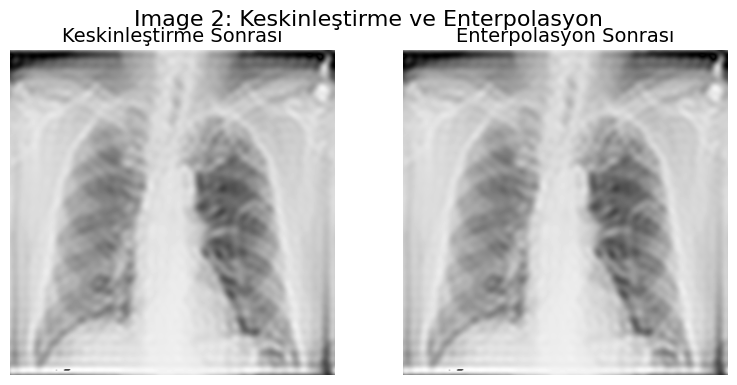

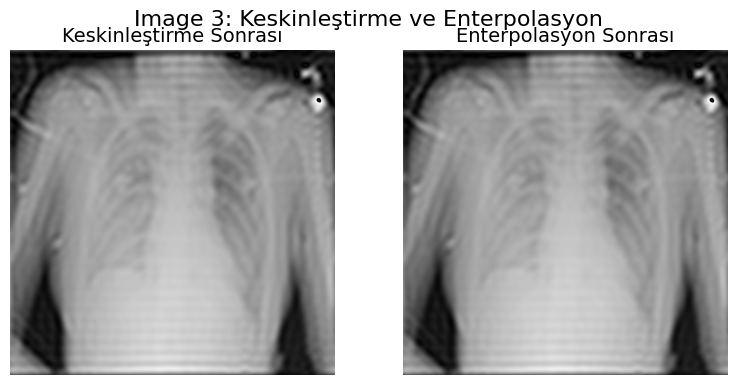

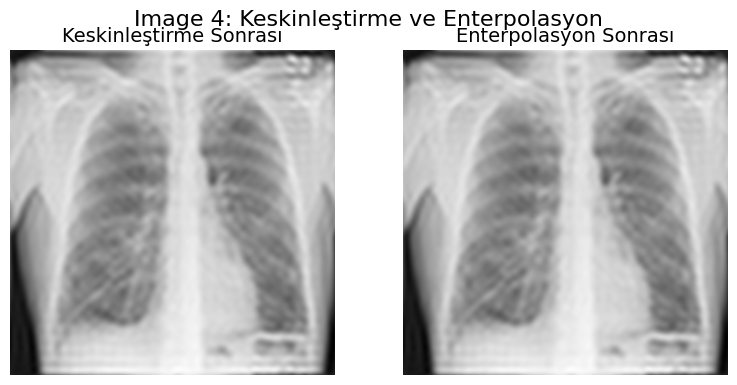

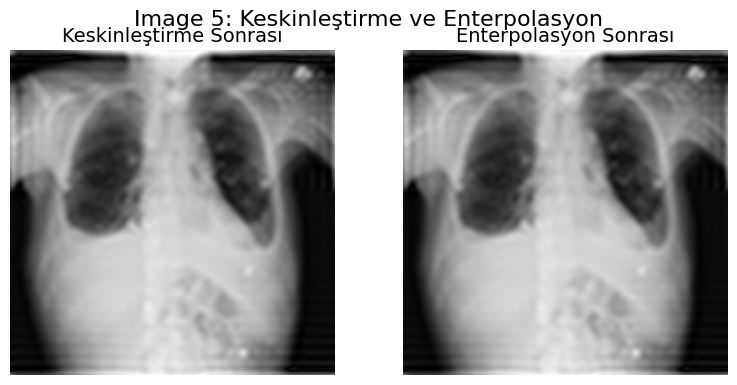

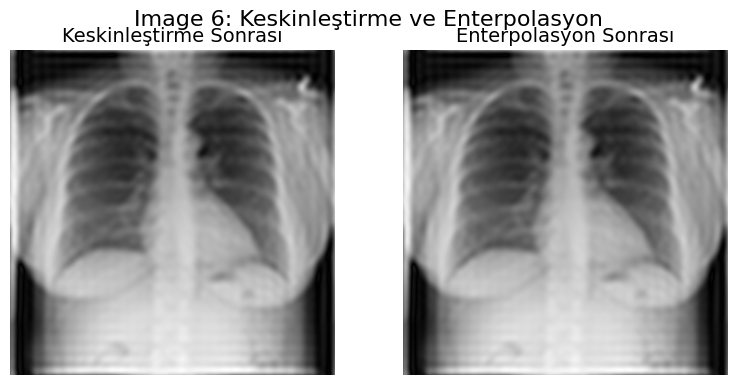

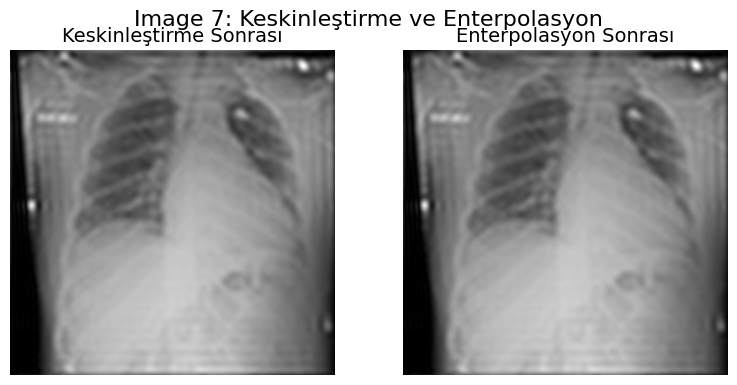

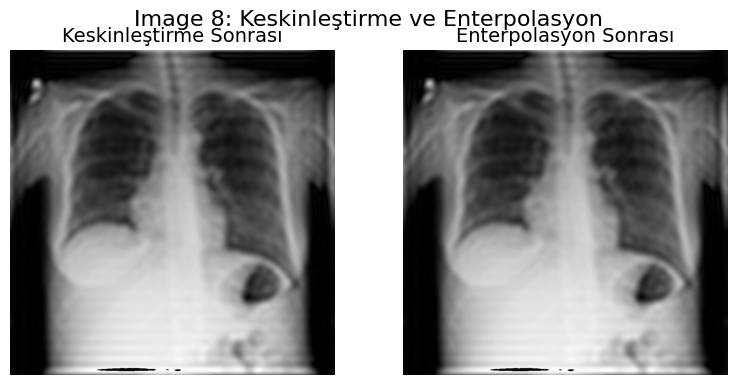

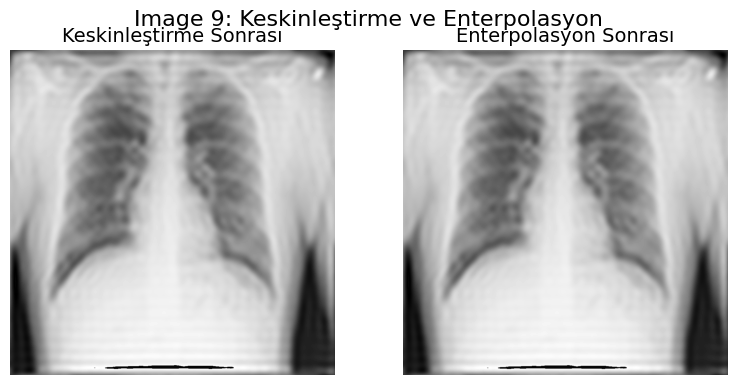

In [16]:
# Keskinleştirme Fonksiyonu
def unsharp_mask(img, strength, blur_ksize):
    blurred = cv2.GaussianBlur(img, (blur_ksize, blur_ksize), 0)
    return cv2.addWeighted(img, 1 + strength, blurred, -strength, 0)

# Bicubic Enterpolasyon Fonksiyonu
def bicubic_interpolation(img, scale):
    height, width = img.shape
    return cv2.resize(img, (width * scale, height * scale), interpolation=cv2.INTER_CUBIC)

# İşleme ve Görselleştirme
for idx, filtered_img in enumerate(filtered_images):  # filtered_images daha önce Fourier işleminden geçirilmiş görüntüleri içerir.
    # Keskinleştirme
    sharp_img = unsharp_mask(filtered_img, strength=1.5, blur_ksize=5)
    # Enterpolasyon
    interpolated_img = bicubic_interpolation(sharp_img, scale=2)

    # Görüntüleri Görselleştirme
    plt.figure(figsize=(8, 4))

    # Keskinleştirilmiş Görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(sharp_img, cmap='gray')
    plt.title("Keskinleştirme Sonrası", fontsize=14)
    plt.axis('off')

    # Enterpolasyon Sonrası Görüntü
    plt.subplot(1, 2, 2)
    plt.imshow(interpolated_img, cmap='gray')
    plt.title("Enterpolasyon Sonrası", fontsize=14)
    plt.axis('off')

    plt.suptitle(f"Image {idx + 1}: Keskinleştirme ve Enterpolasyon", fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()


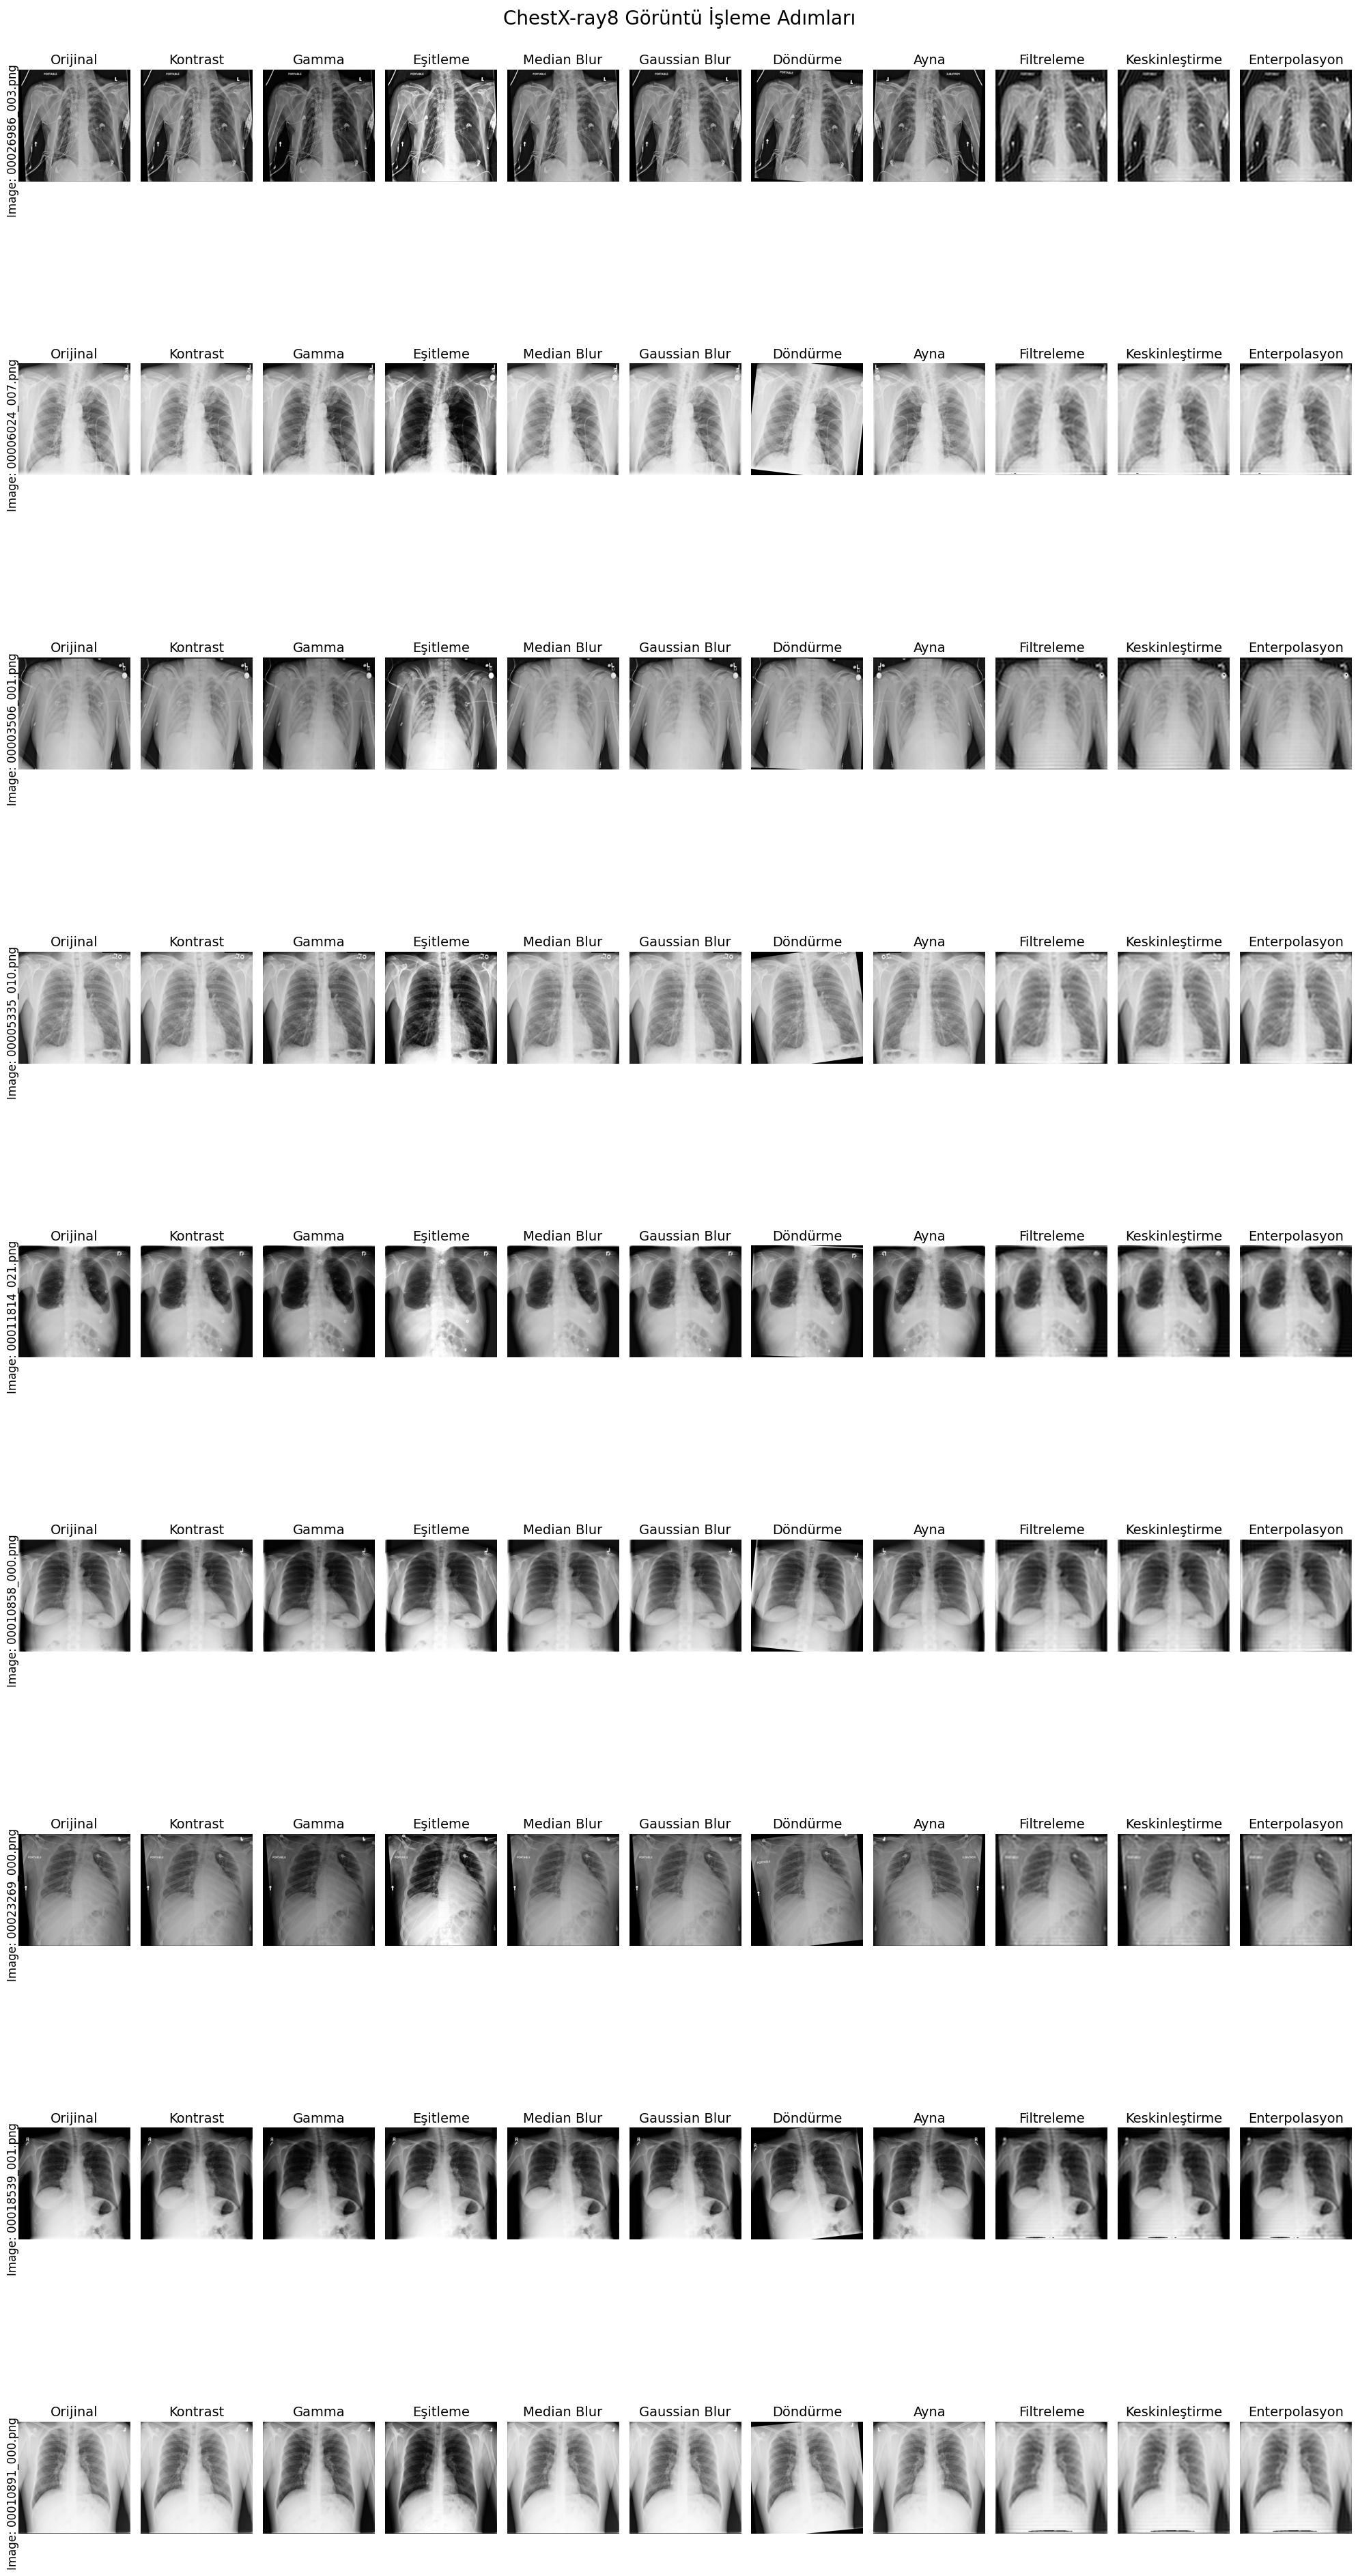

In [15]:
plt.figure(figsize=(20, 40))

# Loop over each sample image
for idx, image_name in enumerate(sample_images):
    img, contrast_img, gamma_img, equalized_img = enhanced_images[idx]
    contrast_img, median_img, gaussian_img = denoised_images[idx]
    median_img, rotated_img, flipped_img = transformed_images[idx]
    filtered_img = filtered_images[idx]
    sharp_img, interpolated_img = final_images[idx]

    # Images for each row
    images = [img, contrast_img, gamma_img, equalized_img, median_img, gaussian_img,
              rotated_img, flipped_img, filtered_img, sharp_img, interpolated_img]
    titles = ['Orijinal', 'Kontrast', 'Gamma', 'Eşitleme', 'Median Blur',
              'Gaussian Blur', 'Döndürme', 'Ayna', 'Filtreleme', 'Keskinleştirme', 'Enterpolasyon']

    # Add the image name as a title above the row
    row_position = idx * len(images) + 1
    plt.subplot(len(sample_images), len(images), row_position)
    plt.text(len(images) // 2, -50, f"Image: {image_name}", fontsize=12,rotation=90, ha='right', va='top')

    # Plot each image in the row
    for step, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(len(sample_images), len(images), idx * len(images) + step + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(title, fontsize=14)

plt.suptitle("ChestX-ray8 Görüntü İşleme Adımları", fontsize=20, y=0.97)
plt.tight_layout()
plt.show()


# ChestX-ray8 Görüntü İşleme Çalışması


Bu projede, ChestX-ray8 veri setindeki görüntüler üzerinde çeşitli görüntü işleme teknikleri uygulanarak, görsellerin kalitesini artırma, gürültü azaltma ve özelliklerini dönüştürme adımları gerçekleştirilmiştir. Amaç, görüntülerin analiz edilebilirliğini ve modelleme süreçlerinde kullanılabilirliğini artırmaktır. Çalışma şu başlıklar altında yürütülmüştür:

1. Görüntü Geliştirme: Görsellerde kontrast artırma, gamma düzeltmesi ve histogram eşitlemesi teknikleriyle görüntülerin dinamik aralığı ve detayları iyileştirilmiştir.

2. Gürültü Azaltma: Median Blur ve Gaussian Blur yöntemleri kullanılarak görüntülerdeki rastgele gürültüler temizlenmiştir. Median Blur keskin kenarların korunmasında, Gaussian Blur ise yumuşak geçişlerde etkili olmuştur.

3. Dönüşüm İşlemleri: Rastgele döndürme ve yatay çevirme gibi veri artırma yöntemleri, modelin farklı perspektifleri öğrenmesi için görüntülere uygulanmıştır.

4. Frekans Alanı Filtreleme: Fourier dönüşümü kullanılarak belirli frekansların filtrelenmesi ile görüntülerde önemli alanların öne çıkarılması sağlanmıştır.

5. Keskinleştirme ve Enterpolasyon: Unsharp mask yöntemi ile görüntülerdeki detaylar keskinleştirilmiş, bicubic enterpolasyon ile görüntü boyutu büyütülmüştür.

6. Görselleştirme: Her bir adımda elde edilen sonuçlar, orijinal ve işlenmiş görüntülerle birlikte görselleştirilerek sürecin etkileri net bir şekilde gözlemlenmiştir.



